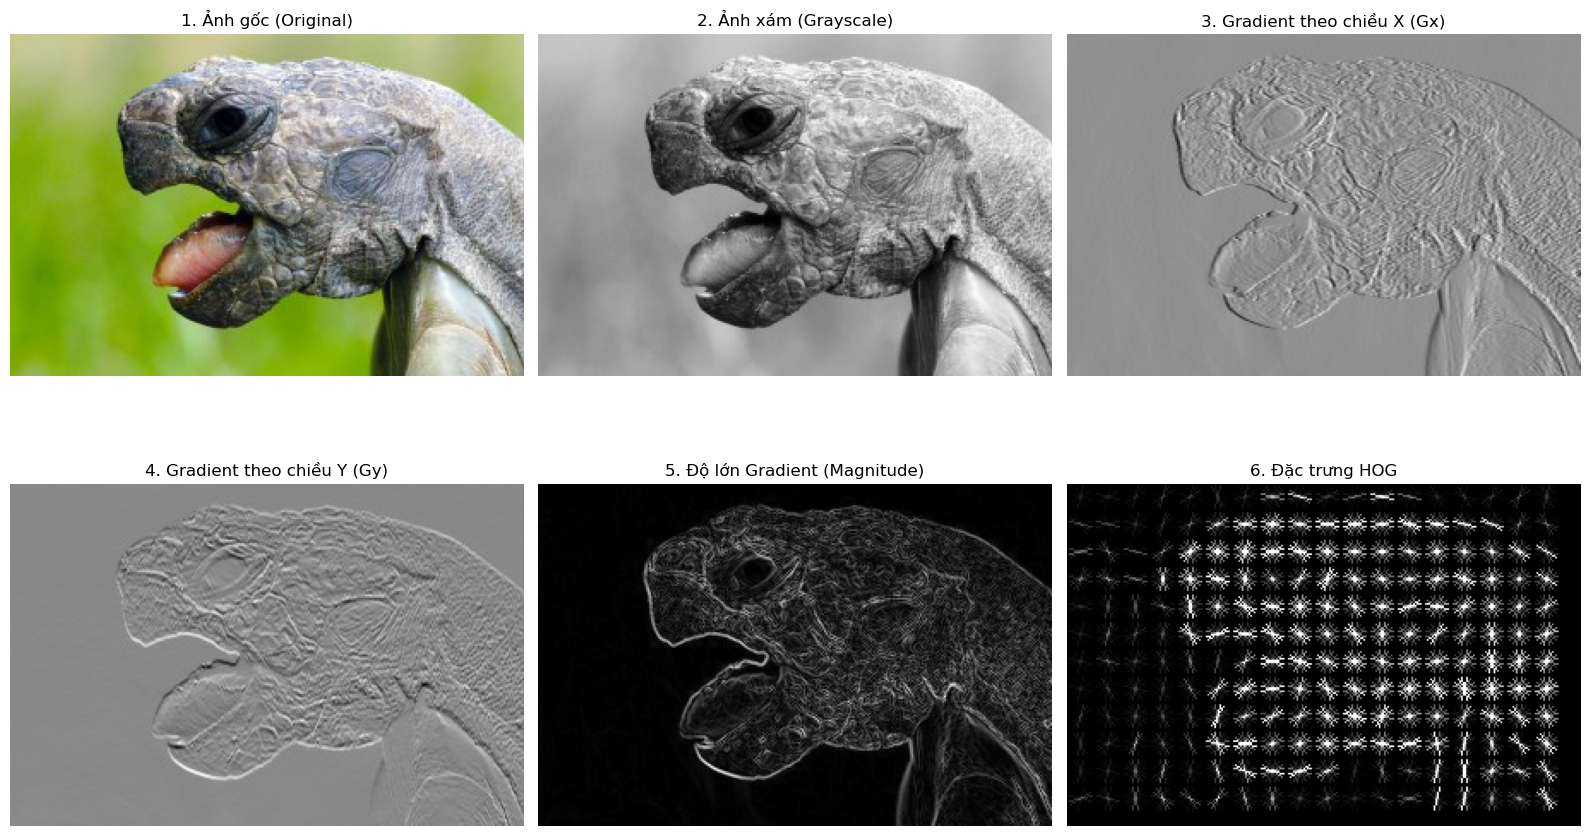

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure, io, color, img_as_float
import numpy as np
import os

def process_and_visualize_hog_steps(image_path):
    """
    Đọc ảnh, thực hiện và hiển thị các bước chính trong quy trình HOG:
    1. Tiền xử lý (Grayscale)
    2. Tính Gradient (Gx, Gy)
    3. Tính độ lớn Gradient (Magnitude)
    4. Kết quả HOG (Histogram of Oriented Gradients)
    """
    if not os.path.exists(image_path):
        print(f"Lỗi: Không tìm thấy file ảnh tại đường dẫn: {image_path}")
        return

    # 1. Load Image
    image = io.imread(image_path)
    
    # Setup plot
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    ax = axes.ravel()

    # --- Step 0: Original Image ---
    ax[0].imshow(image)
    ax[0].set_title('1. Ảnh gốc (Original)')
    ax[0].axis('off')

    # --- Step 1: Preprocessing (Convert to Grayscale) ---
    # HOG thường hoạt động trên ảnh xám hoặc tính gradient trên từng kênh màu.
    # Ở đây ta chuyển sang ảnh xám để dễ hình dung các bước gradient.
    if image.ndim == 3:
        image_gray = color.rgb2gray(image)
    else:
        image_gray = img_as_float(image)
        
    ax[1].imshow(image_gray, cmap='gray')
    ax[1].set_title('2. Ảnh xám (Grayscale)')
    ax[1].axis('off')

    # --- Step 2: Calculate Gradients (Gx, Gy) ---
    # Tính đạo hàm theo phương x và y
    # Sử dụng np.gradient để mô phỏng
    gy, gx = np.gradient(image_gray) 
    
    ax[2].imshow(gx, cmap='gray')
    ax[2].set_title('3. Gradient theo chiều X (Gx)')
    ax[2].axis('off')

    ax[3].imshow(gy, cmap='gray')
    ax[3].set_title('4. Gradient theo chiều Y (Gy)')
    ax[3].axis('off')

    # --- Step 3: Calculate Gradient Magnitude ---
    # Độ lớn của gradient tại mỗi điểm ảnh
    magnitude = np.sqrt(gx**2 + gy**2)
    
    ax[4].imshow(magnitude, cmap='gray')
    ax[4].set_title('5. Độ lớn Gradient (Magnitude)')
    ax[4].axis('off')

    # --- Step 4: HOG Feature Visualization ---
    # Sử dụng hàm hog của skimage để tính toán và trực quan hóa kết quả cuối cùng
    # (Bao gồm chia cell, tính histogram, block normalization)
    fd, hog_image = hog(
        image, 
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        visualize=True,
        channel_axis=-1 if image.ndim == 3 else None,
    )
    
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax[5].imshow(hog_image_rescaled, cmap='gray')
    ax[5].set_title('6. Đặc trưng HOG')
    ax[5].axis('off')

    plt.tight_layout()
    plt.show()

# --- Hướng dẫn sử dụng ---
# Thay đổi đường dẫn bên dưới thành ảnh bạn muốn kiểm tra
input_image_path = 'project/raw_dataset/Turtle_Tortoise/Turtle_Tortoise (6).jpg' 

# Gọi hàm để xử lý
process_and_visualize_hog_steps(input_image_path)